In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

**Proszę nie używać dostępnych bibliotek sieci neuronowych. Do implementacji sieci proszę użyć macierzy stosując bibliotekę numpy.**

#1. Wczytaj pełny zbiór danych iris. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe oraz przeprowadź na nich normalizacje,

In [2]:
iris = datasets.load_iris()
X = iris.data
yy = iris.target
y=to_categorical(yy)
norm=np.linalg.norm(X)
X/=norm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#2. Zaproponuj optymalną sieć neuronową klasyfikującą wczytane dane. Użyj nieliniowej funkcji aktywacji w warstwie ukrytej (np. tanh lub sigmoidalna). Stosując propagację wsteczną błędu wytrenuj sieć metodą wsadową.

In [3]:
class Sigmoid():
  def acti(self, s):
    return 1 / (1 + np.exp(-s))
  def der(self, x):
    a = self.acti(x)
    return a * (1 - a)

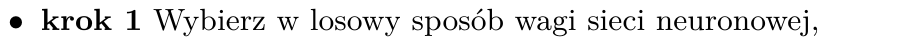

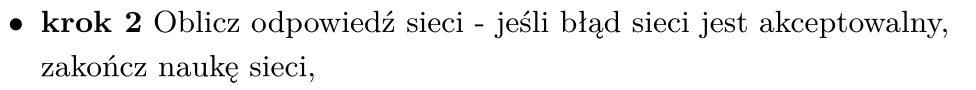

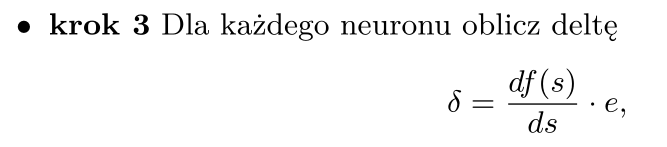

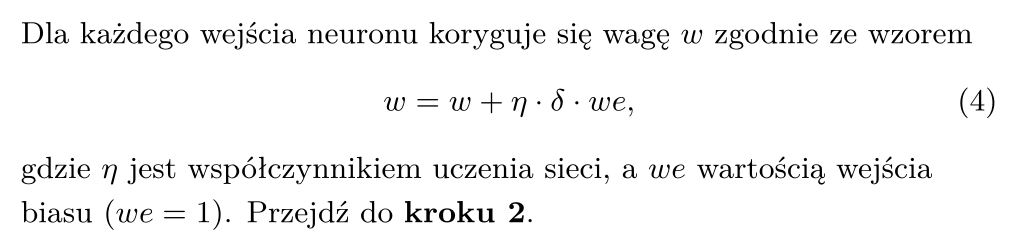

In [4]:
class Neuron():
  def __init__(self, input, acti, eta):
    self.W=np.random.rand(input)*2-1
    self.Wb=np.random.rand(1)[0]
    self.acti=acti
    self.eta=eta

  def predict(self, x):
    y=self.W*x
    y=sum(y)
    y+=self.Wb
    self.last_s=y
    return self.acti.acti(y)

  def fit(self, e):
    e_p=self.W*e
    d=self.acti.der(self.last_s)*e
    self.W=self.W+self.eta*d
    self.Wb=self.Wb+self.eta*d
    return e_p

W przypadku warstw ukrytych błąd dla neuronu liczy się jako suma iloczynów wagi łączącej z kolejną warstwą i błędem danego neuronu kolejnej warstwy, ważne żeby wagi z kolejnej warstwy pobrać przed ich modyfikacją. W przypadku warstwy wyjściowej błąd liczymy bezpośrednio

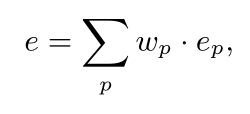

In [5]:
class Layer():
  def __init__(self, input, output, acti, eta):
    self.neurons=[]
    self.input=input
    for i in range(output):
      self.neurons.append(Neuron(input, acti, eta))

  def predict(self, x):
    y=[]
    for n in self.neurons:
      y.append(n.predict(x))
    return y

  def fit(self, e):
    e_p=np.zeros(self.input)
    for i, n in enumerate(self.neurons):
      e_p_one = n.fit(e[i])
      e_p=e_p+e_p_one
    return e_p

In [6]:
class NeuronNetwork():
  def __init__(self, layers, acti, eta):
    self.layers=[]
    for i in range(1, len(layers)):
      self.layers.append(Layer(layers[i-1], layers[i], acti, eta))
  
  def predict(self, x):
    x_in=x.copy()
    for l in self.layers:
      x_in=l.predict(x_in)
    return x_in

  def fit(self, e):
    layers_reverse = self.layers.copy()
    layers_reverse.reverse()
    for l in layers_reverse:
      e = l.fit(e)

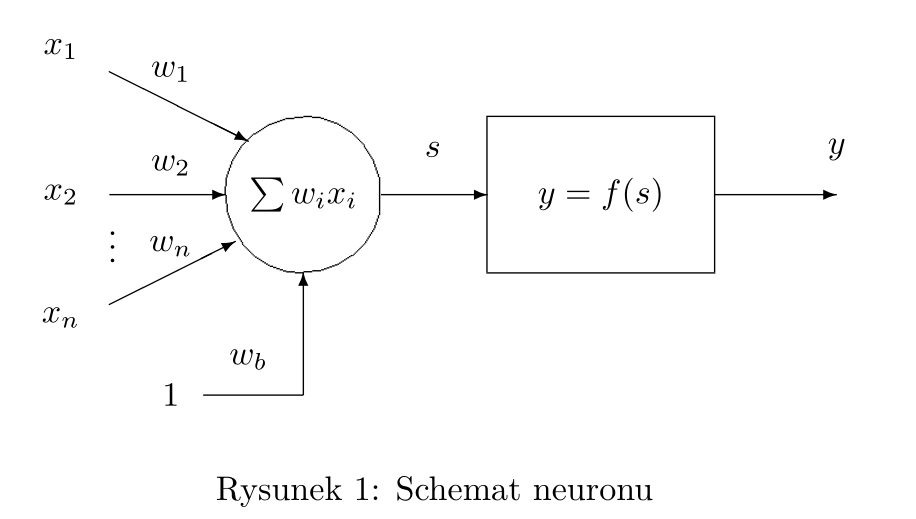

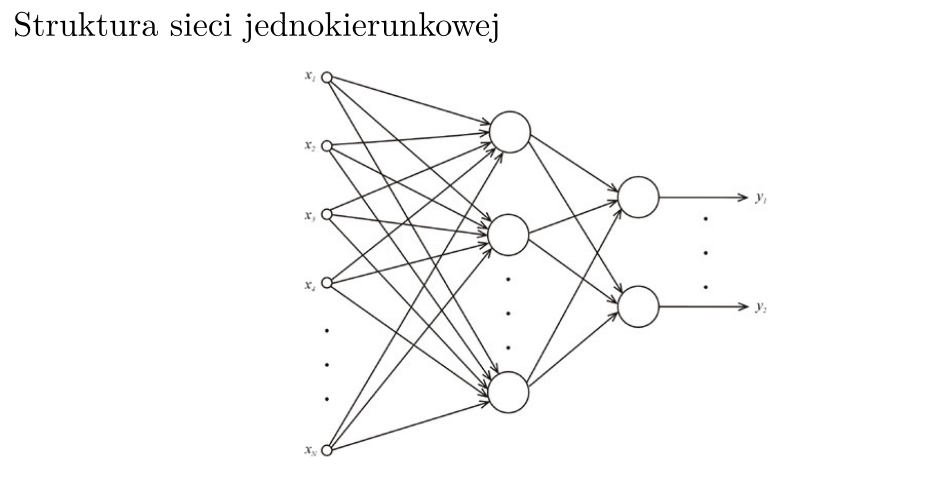

In [7]:
def batch(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    # print('================================')
    # print(i)
    e=0
    a=0
    for xe, ye in zip(X, y):
      # print('---------------------')
      p = NN.predict(xe)
      e+=(ye-p)
      # print(p)
      # print(ye)
      if np.argmax(p) == np.argmax(ye):
        a+=1
      #   print('dobrze')
      # else:
      #   print('zle')
      # print(p)
      # print(ye)
    e/=len(X)
    NN.fit(e)
    # print(e)
    loss.append(e)
    accuracy.append(a/len(y))
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


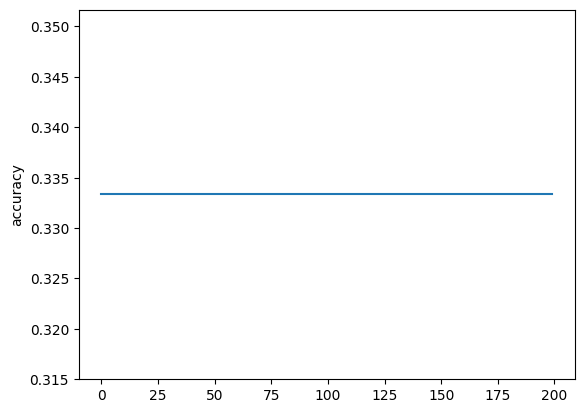

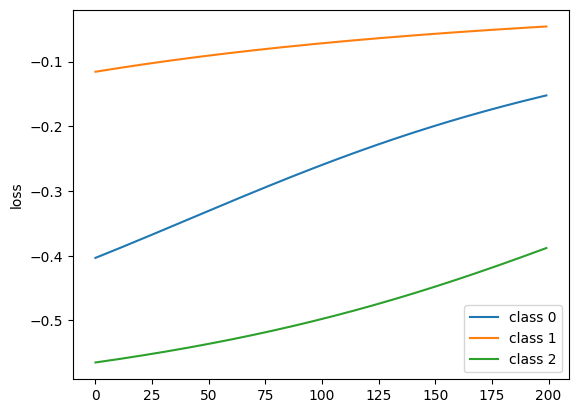

In [12]:
batch(NeuronNetwork([4, 10, 3], Sigmoid(), 0.01), 200)

In [9]:
def online(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    # print('================================')
    # print(i)
    a=0
    loss_e=0
    for xe, ye in zip(X, y):
      p = NN.predict(xe)
      e=ye-p
      loss_e+=e
      NN.fit(e)
      if np.argmax(p) == np.argmax(ye):
        # print('dobrze')
        a+=1
      # print('-----------------')
      # print(ye)
      # print(p)

    accuracy.append(a/len(y))
    loss.append(loss_e)
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


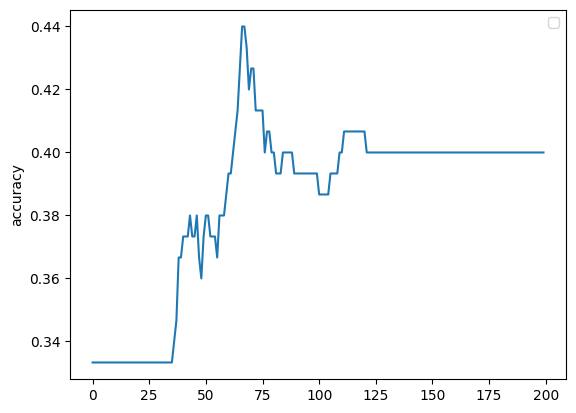

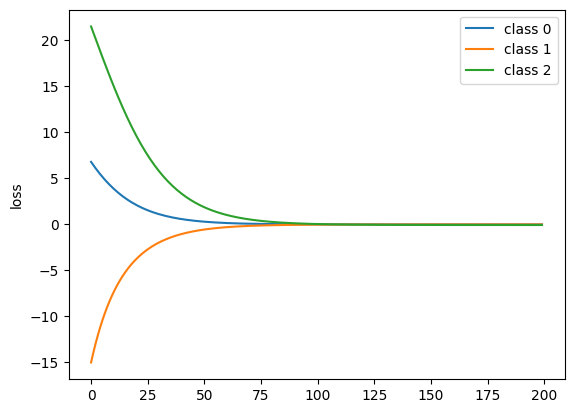

In [14]:
online(NeuronNetwork([4, 10, 3], Sigmoid(), 0.001), 200)